In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="C:/Users/nicol/OneDrive/Documentos/VSCLocal/Data/TFM/"
df=pd.read_csv(path+"datos_procesados_8.csv")

In [3]:
# Filtramos los pisos cuyo precio es inferior a 800,000 euros.
df = df[(df['price'] <= 800000)]
print('Cantidad de pisos cuyo precio es inferior a 800,000:',df.count()['price'])

# Incrementar en una la cantidad de habitaciones en los studios que tienen 0 habitaciones.
df['rooms'] = df.apply(lambda row: row['rooms'] + 1 if row['propertyType'] == 'studio' else row['rooms'], axis=1)

# Eliminar filas donde 'rooms' o 'bathrooms' es 0
df = df.drop(df[(df['rooms'] == 0) | (df['bathrooms'] == 0)].index)




Cantidad de pisos cuyo precio es inferior a 800,000: 10567


In [8]:
df[df['floor'] ==21]

,propertyCode,price,floor,propertyType,size,exterior,rooms,bathrooms,district,neighborhood,...,longitude,distance,status,newDevelopment,hasLift,priceByArea,newDevelopmentFinished,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
6962,104384036,600000.0,21,flat,96.0,1,2,2,Hortaleza,Virgen del Cortijo - Manoteras,...,-3.671237,8160,good,0,1,6250.0,0,1,1,0.0
14069,104217183,720000.0,21,flat,112.0,1,2,2,Tetuán,Valdeacederas,...,-3.708648,5720,newdevelopment,1,1,6429.0,1,1,1,0.0
14153,104312478,720000.0,21,flat,111.0,1,2,2,Tetuán,Valdeacederas,...,-3.708648,5720,good,0,1,6486.0,0,1,1,0.0


In [224]:
# Creación de nuevas características
df['roomSize'] = df['size'] / df['rooms']
df['bathroomSize'] = df['size'] / df['bathrooms']
df['bathroomRoom'] = df['bathrooms'] / df['rooms']
df['liftFloorInteraction'] = df['hasLift'] * df['floor']

In [225]:

# Verificar el DataFrame resultante
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10531 entries, 1 to 14550
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   propertyCode                   10531 non-null  int64  
 1   price                          10531 non-null  float64
 2   floor                          10531 non-null  int64  
 3   propertyType                   10531 non-null  object 
 4   size                           10531 non-null  float64
 5   exterior                       10531 non-null  int64  
 6   rooms                          10531 non-null  int64  
 7   bathrooms                      10531 non-null  int64  
 8   district                       10531 non-null  object 
 9   neighborhood                   10531 non-null  object 
 10  latitude                       10531 non-null  float64
 11  longitude                      10531 non-null  float64
 12  distance                       10531 non-null  int6

In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'district', 'neighborhood', 'latitude', 'longitude',
       'distance', 'status','hasLift', 'priceByArea','hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 
       'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas
categorical_features = ['propertyType', 'status','district','neighborhood']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define transformaciones para las variables numéricas
numeric_features = ['priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',
                    'hasLift','hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 
                    'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Entrena el modelo
model.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
root_mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root_Mean Squared Error:", root_mse)

Mean Squared Error: 3468281596.3103633
Root_Mean Squared Error: 58892.11828683328


In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'district', 'neighborhood', 'latitude', 'longitude',
       'distance', 'status','hasLift', 'priceByArea','hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 
       'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas
categorical_features = ['propertyType', 'status','district','neighborhood']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define transformaciones para las variables numéricas
numeric_features = ['priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',
                    'hasLift','hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 
                    'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])

# Entrena el modelo
model.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
root_mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", root_mse)


Mean Squared Error: 320016850.98475456
Root Mean Squared Error: 17889.01481314034


In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from category_encoders import TargetEncoder
from scipy.stats import randint, uniform

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'district', 'neighborhood', 'latitude', 'longitude',
       'distance', 'status','hasLift', 'priceByArea','hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 
       'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas y numéricas
categorical_features = ['propertyType', 'status', 'district', 'neighborhood']
categorical_transformer = TargetEncoder()

numeric_features = ['priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',
                    'hasLift','hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 
                    'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']
numeric_transformer = StandardScaler()

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])

# Define la distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'regressor__n_estimators': randint(600, 800),
    'regressor__learning_rate': uniform(0.05, 0.15),
    'regressor__max_depth': randint(3, 6)
}

# Aplica la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

# Obtiene el mejor modelo
best_model = random_search.best_estimator_

# Evalúa el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 81105397.60942827
Root Mean Squared Error: 9005.853519207842
Mean Absolute Error: 4995.572882935196


In [229]:
print(f"Total de datos filtrados menores a 800,000: {df['price'].count()}")
print(f"rmse // mean: {rmse/df['price'].mean()}")

Total de datos filtrados menores a 800,000: 10531
rmse // mean: 0.024727624898335913


In [230]:
# Obtiene los hiperparámetros del modelo GradientBoostingRegressor
params_regressor = best_model.named_steps['regressor'].get_params()
print("Hiperparámetros del modelo GradientBoostingRegressor:")
print(params_regressor)

Hiperparámetros del modelo GradientBoostingRegressor:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.08843721484771297, 'loss': 'squared_error', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 759, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


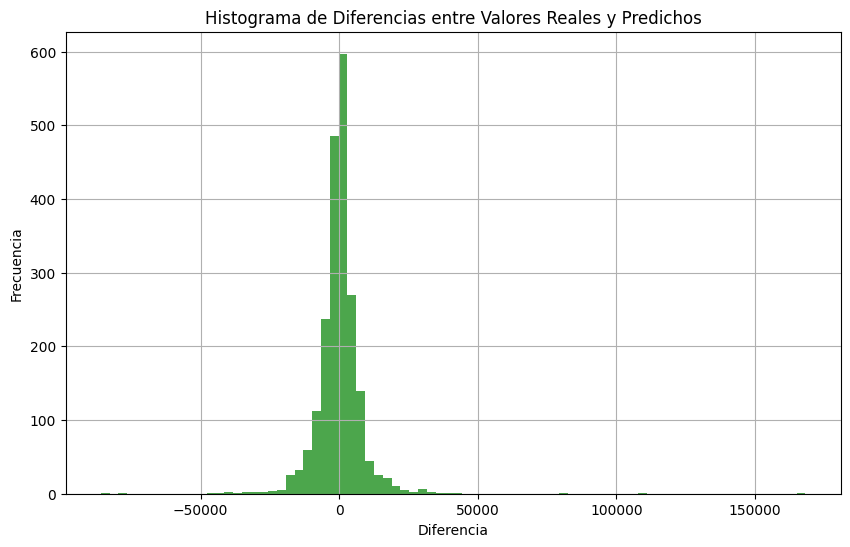

In [231]:
import matplotlib.pyplot as plt

# Calcular las diferencias entre los valores reales y predichos
differences = y_test - y_pred

# Graficar el histograma de las diferencias
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=80, color='green', alpha=0.7)
plt.title('Histograma de Diferencias entre Valores Reales y Predichos')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Media de las diferencias: 59.66170591392114
Mediana de las diferencias: 110.11007518952829
Desviación estándar de las diferencias: 9005.655894507392


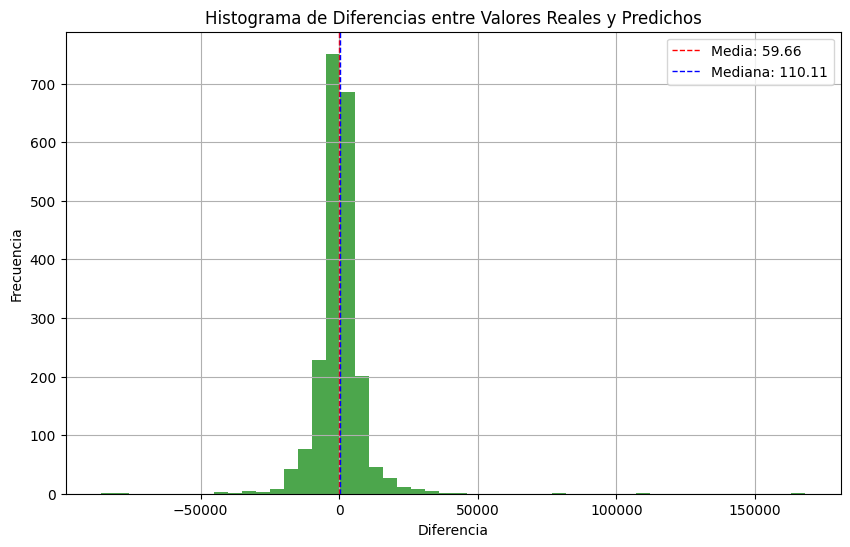

Número de diferencias extremas: 254
Valores extremos detectados:
12103    28468.815394
7091     19047.579751
6245     10170.713052
10127   -12640.709414
2871    -14964.114608
             ...     
12655   -21708.959770
13733    39962.989558
7154    -16251.926783
448     -13928.683991
12967   -31504.271274
Name: price, Length: 254, dtype: float64


In [232]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular las diferencias entre los valores reales y predichos
differences = y_test - y_pred

# Calcular métricas estadísticas
mean_diff = np.mean(differences)
median_diff = np.median(differences)
std_diff = np.std(differences)

# Imprimir las métricas estadísticas
print(f'Media de las diferencias: {mean_diff}')
print(f'Mediana de las diferencias: {median_diff}')
print(f'Desviación estándar de las diferencias: {std_diff}')

# Graficar el histograma de las diferencias
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=50, color='green', alpha=0.7)  # Ajustar el número de bins según sea necesario
plt.title('Histograma de Diferencias entre Valores Reales y Predichos')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.grid(True)

# Agregar líneas de las métricas estadísticas en el histograma
plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_diff:.2f}')
plt.axvline(median_diff, color='blue', linestyle='dashed', linewidth=1, label=f'Mediana: {median_diff:.2f}')
plt.legend()

# Mostrar la gráfica
plt.show()

# Verificar datos extremos
extreme_diff = differences[(differences < -10000) | (differences > 10000)]
print(f'Número de diferencias extremas: {len(extreme_diff)}')
if len(extreme_diff) > 0:
    print('Valores extremos detectados:')
    print(extreme_diff)
else:
    print('No se detectaron valores extremos significativos.')


In [233]:
import pandas as pd
import numpy as np

# Ejemplo de DataFrame (reemplaza esto con tus datos reales)
df = pd.DataFrame({'y_test': y_test,'y_pred': y_pred})

# Calcular las diferencias entre los valores reales y predichos
df['difference'] = df['y_test'] - df['y_pred']

# Identificar valores extremos usando el método del IQR
Q1 = df['difference'].quantile(0.25)
Q3 = df['difference'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los valores extremos
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

extremes_iqr = df[(df['difference'] < lower_bound_iqr) | (df['difference'] > upper_bound_iqr)]

print(f'Valores extremos identificados por IQR: {len(extremes_iqr)}')
print(extremes_iqr)

# Identificar valores extremos usando el método de la desviación estándar
mean_diff = df['difference'].mean()
std_diff = df['difference'].std()

# Definir límites para los valores extremos (usualmente 3 desviaciones estándar)
lower_bound_std = mean_diff - 3 * std_diff
upper_bound_std = mean_diff + 3 * std_diff

extremes_std = df[(df['difference'] < lower_bound_std) | (df['difference'] > upper_bound_std)]

print(f'Valores extremos identificados por Desviación Estándar: {len(extremes_std)}')
print(extremes_std)


Valores extremos identificados por IQR: 176
         y_test         y_pred    difference
12103  720000.0  691531.184606  28468.815394
7091   700000.0  680952.420249  19047.579751
10127  350000.0  362640.709414 -12640.709414
2871   350000.0  364964.114608 -14964.114608
7683   592000.0  607087.755601 -15087.755601
...         ...            ...           ...
12655  730000.0  751708.959770 -21708.959770
13733  770000.0  730037.010442  39962.989558
7154   215000.0  231251.926783 -16251.926783
448    370000.0  383928.683991 -13928.683991
12967  306500.0  338004.271274 -31504.271274

[176 rows x 3 columns]
Valores extremos identificados por Desviación Estándar: 29
         y_test         y_pred     difference
12103  720000.0  691531.184606   28468.815394
144    109900.0  153456.572082  -43556.572082
5626   750000.0  581826.686296  168173.313704
11505  670000.0  706360.681212  -36360.681212
5458   476500.0  504877.477754  -28377.477754
10351  490000.0  461369.084134   28630.915866
7445   2495

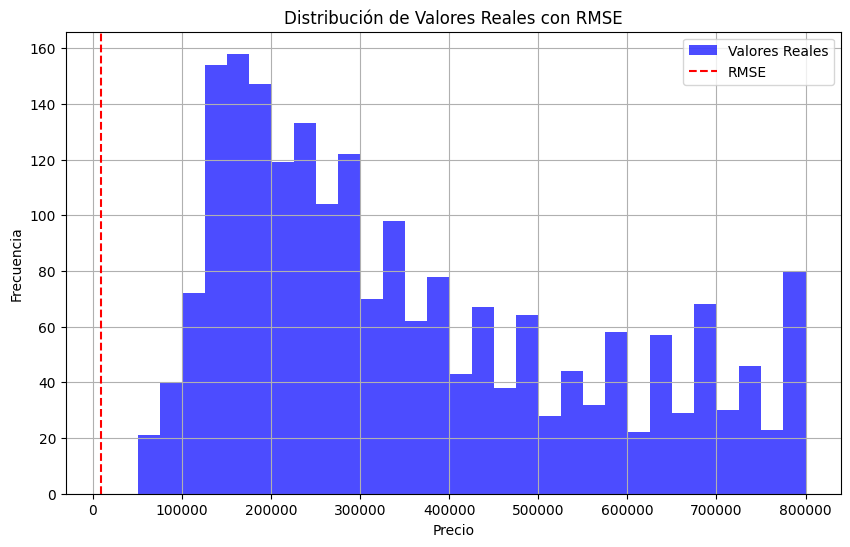

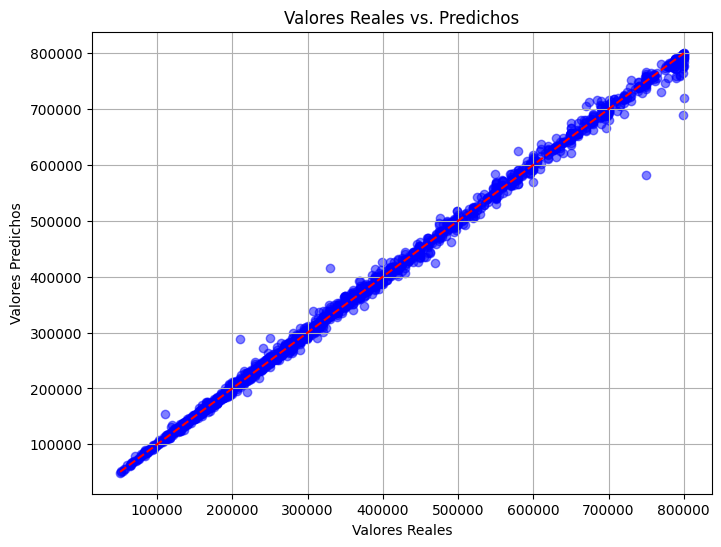

In [234]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que y_test contiene los valores reales y y_pred contiene los valores predichos
# También asumiendo que RMSE ya está calculado y almacenado en una variable llamada 'rmse'

# Comparar el RMSE con la distribución de la variable Y ('price')
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, color='blue', alpha=0.7, label='Valores Reales')
plt.axvline(x=rmse, color='red', linestyle='--', label='RMSE')
plt.title('Distribución de Valores Reales con RMSE')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la relación entre valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Valores Reales vs. Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()




In [236]:
import pandas as pd

# Supongamos que tienes tu DataFrame llamado df

# Definimos los límites de los tramos
max_price = int(df['price'].max())
bins = range(0, max_price + 50000, 50000)

# Etiquetamos los tramos
labels = [f'{i}-{i+49999}' for i in bins[:-1]]

# Creamos una nueva columna en el DataFrame que contendrá los tramos
df['price_bucket'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Mostramos los primeros registros del DataFrame con la nueva columna de bucketing
print(df[['price', 'price_bucket']].head())


KeyError: 'price'

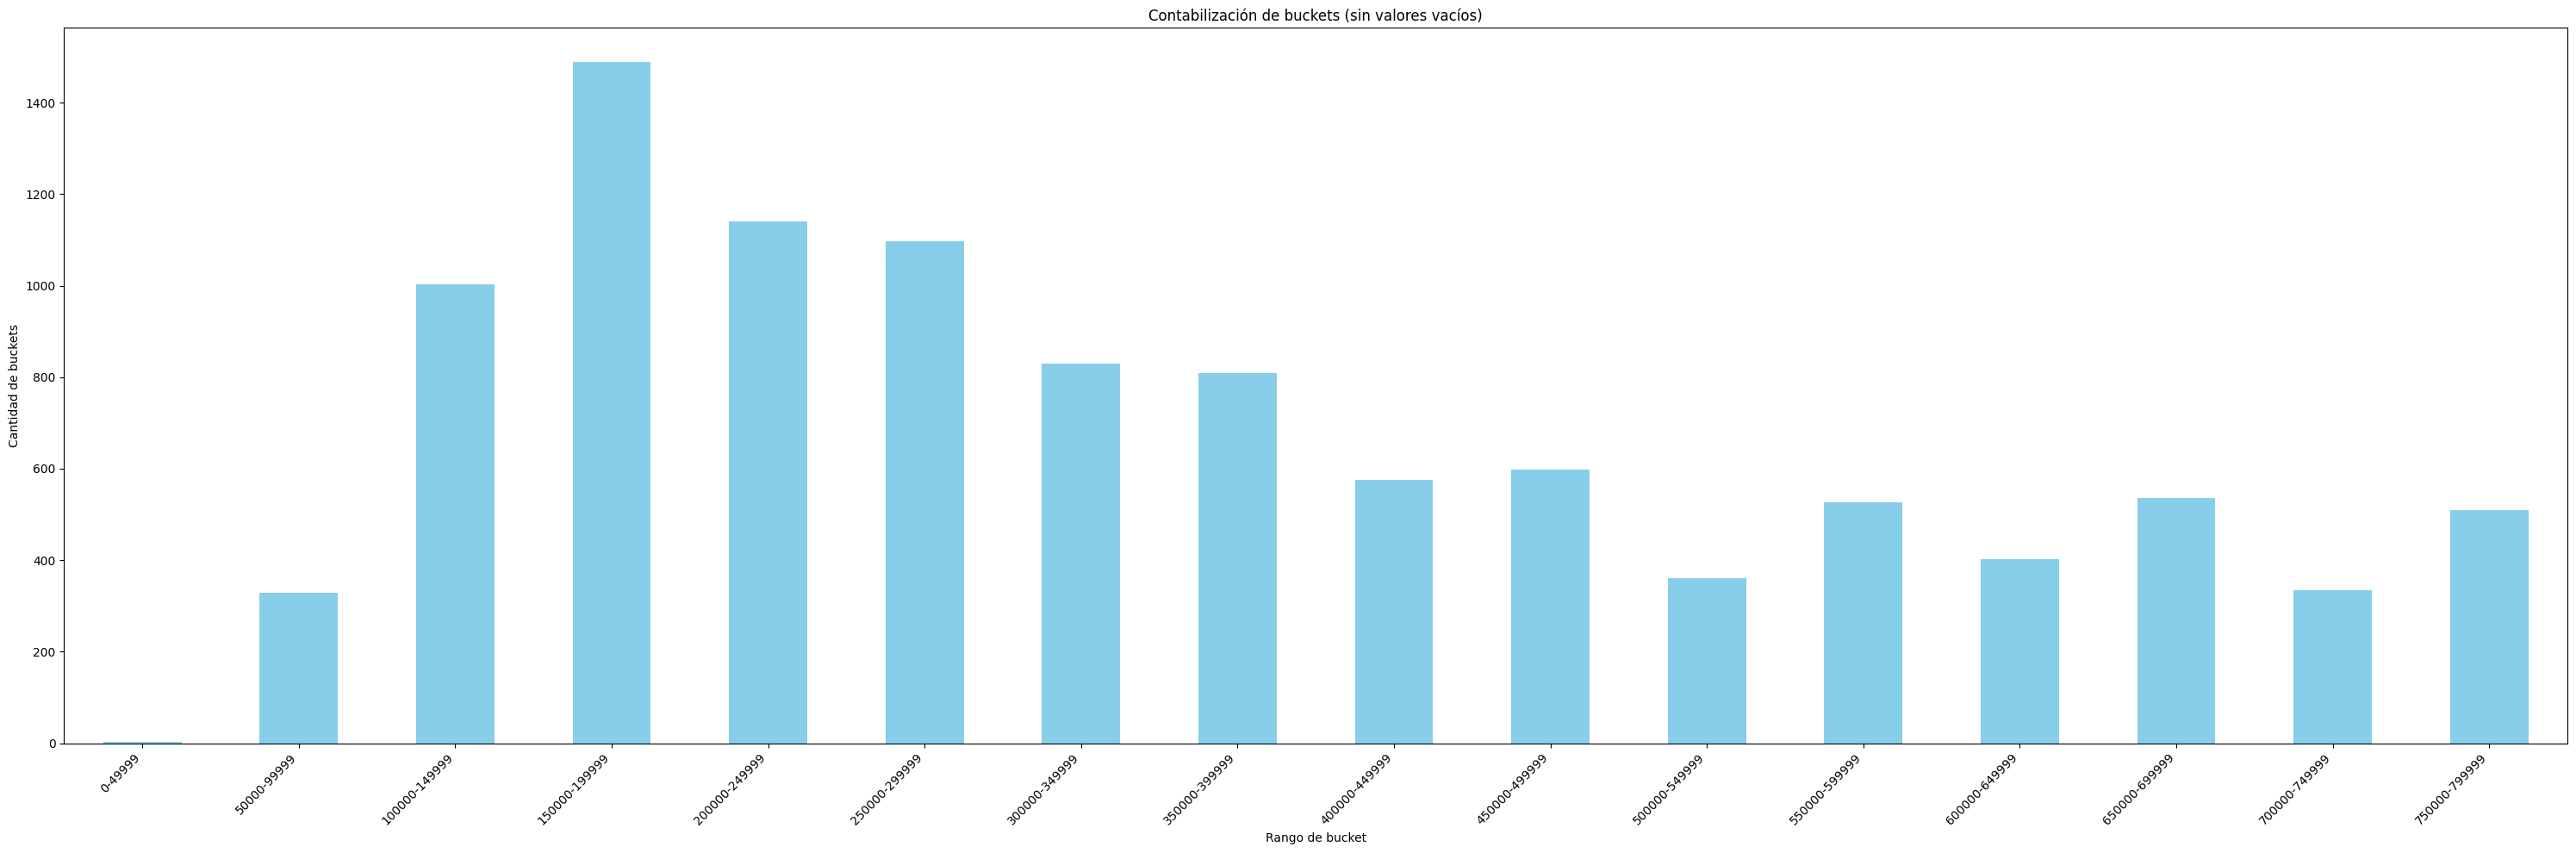

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame df con la columna 'price_bucket' creada

# Agrupamos por 'price_bucket' y contamos las observaciones en cada grupo
grouped_data = df.groupby('price_bucket', observed=False)['price'].count()
# Filtramos los buckets que tienen valores no nulos
grouped_data = grouped_data[grouped_data != 0]

# Creamos el gráfico de barras
plt.figure(figsize=(30, 10))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Contabilización de buckets (sin valores vacíos)')
plt.xlabel('Rango de bucket')
plt.ylabel('Cantidad de buckets')
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [ ]:
display(grouped_data)

price_bucket
0-49999             3
50000-99999       328
100000-149999    1003
150000-199999    1489
200000-249999    1140
250000-299999    1097
300000-349999     829
350000-399999     809
400000-449999     575
450000-499999     598
500000-549999     361
550000-599999     526
600000-649999     402
650000-699999     535
700000-749999     335
750000-799999     509
Name: price, dtype: int64

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
y_pred_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)

# Calcular métricas de evaluación en el conjunto de entrenamiento
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("Training Set Metrics:")
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("Mean Absolute Error:", mae_train)

# Comparar métricas de entrenamiento y prueba
print("\nComparison with Test Set:")
print("Training MSE vs Test MSE:", mse_train - mse)
print("Training RMSE vs Test RMSE:", rmse_train - rmse)
print("Training MAE vs Test MAE:", mae_train - mae)


Training Set Metrics:
Mean Squared Error: 24383051.53799162
Root Mean Squared Error: 4937.919758156427
Mean Absolute Error: 3698.3169254624127

Comparison with Test Set:
Training MSE vs Test MSE: -39235252.78373928
Training RMSE vs Test RMSE: -3038.188586251321
Training MAE vs Test MAE: -1302.2184632821154


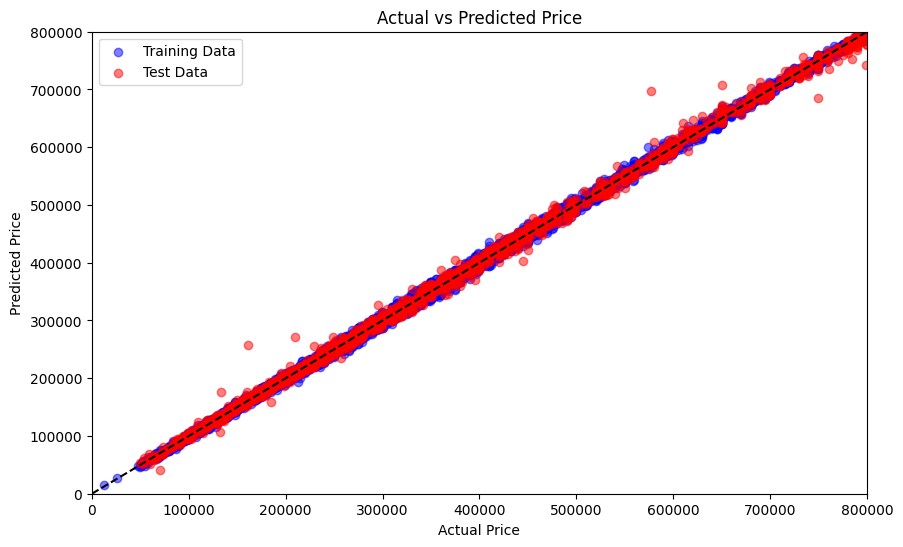

In [ ]:
import matplotlib.pyplot as plt

# Predicciones del conjunto de entrenamiento
y_train_pred = best_model.predict(X_train)

# Predicciones del conjunto de prueba
y_test_pred = best_model.predict(X_test)

# Graficar las predicciones del conjunto de entrenamiento y conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Test Data', color='red', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend(loc='upper left')
plt.plot([0, 800000], [0, 800000], color='black', linestyle='--') # Línea de referencia de la igualdad
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.show()
